**Decision Tree** 

In [8]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

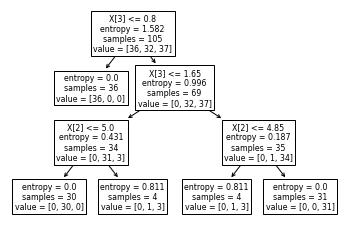

In [12]:
from sklearn import tree
tree.plot_tree(clf)

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

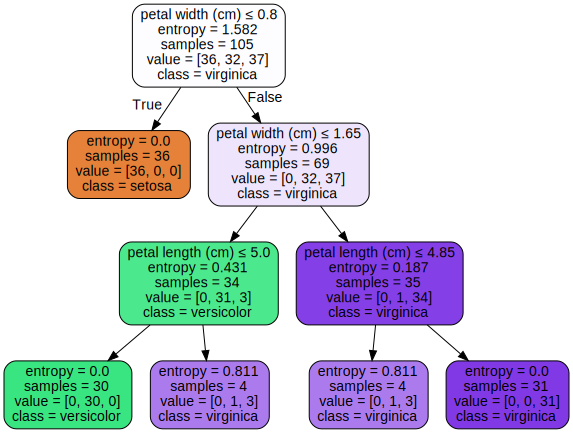

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 

**Random Forest** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [ ]:
rnd_clf = RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

rnd_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rnd_clf.feature_importances_

array([0.03836406, 0.00120829, 0.00580568, 0.00076799, 0.01770719,
       0.29158535, 0.01508759, 0.07081902, 0.0030469 , 0.01802331,
       0.0107546 , 0.01229057, 0.51453947])

<BarContainer object of 13 artists>

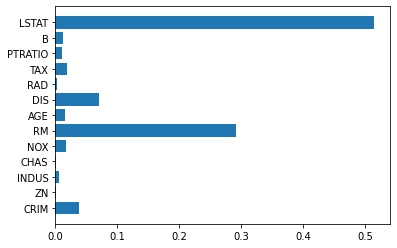

In [ ]:
import matplotlib.pyplot as plt

plt.barh(boston.feature_names, rnd_clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

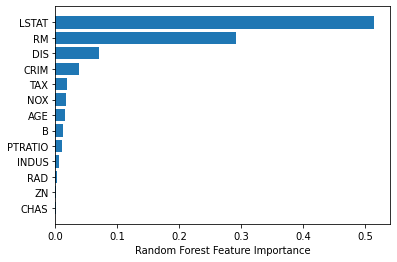

In [ ]:
sorted_idx = rnd_clf.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], rnd_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")